In [168]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

def truncated_svd(A, k=None):
    eigs, vecs = la.eig(np.conj(A.T)@A)
    eigen_dict = {eigs[i] ** 0.5: np.vstack(vecs[:, i]) for i in range(len(eigs))}
    if k is None:
        singular_vals = sorted([x for x in eigen_dict if x != 0], reverse=True)
    else:
        singular_vals = sorted([x for x in eigen_dict if x != 0], reverse=True)[:k]
    Sigma = np.diag(singular_vals)
    V = np.hstack((eigen_dict[val] for val in singular_vals))
    U = np.hstack((A@eigen_dict[val] / val for val in singular_vals))
    return U, Sigma, V

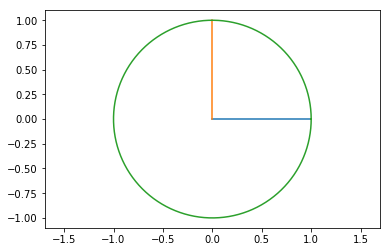

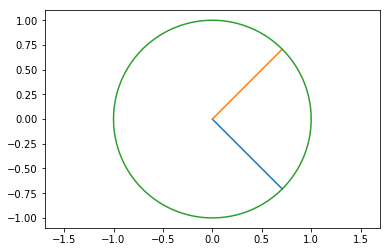

/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


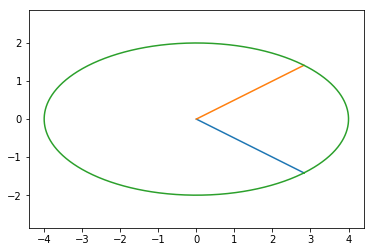

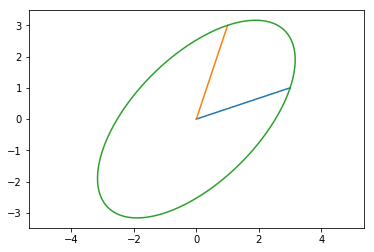

In [169]:
def visualize_circle():
    thetas = np.linspace(0, 2 * np.pi, 1000)
    coords = np.array([[np.cos(theta) for theta in thetas], [np.sin(theta) for theta in thetas]])
    A = np.array([[3, 1], [1, 3]])
    U, Sigma, V = truncated_svd(A)
    V_H = np.conj(V.T)
    e_1 = np.array([[0, 1], [0, 0]])
    e_2 = np.array([[0, 0], [0, 1]])
    plt.plot(e_1[0], e_1[1])
    plt.plot(e_2[0], e_2[1])
    plt.plot(coords[0], coords[1])
    plt.axis('equal')
    plt.show()
    plt.plot((V_H@e_1)[0], (V_H@e_1)[1])
    plt.plot((V_H@e_2)[0], (V_H@e_2)[1])
    plt.plot((V_H@coords)[0], (V_H@coords)[1])
    plt.axis('equal')
    plt.show()
    plt.plot((Sigma@V_H@e_1)[0], (Sigma@V_H@e_1)[1])
    plt.plot((Sigma@V_H@e_2)[0], (Sigma@V_H@e_2)[1])
    plt.plot((Sigma@V_H@coords)[0], (Sigma@V_H@coords)[1])
    plt.axis('equal')
    plt.show()
    plt.plot((U@Sigma@V_H@e_1)[0], (U@Sigma@V_H@e_1)[1])
    plt.plot((U@Sigma@V_H@e_2)[0], (U@Sigma@V_H@e_2)[1])
    plt.plot((U@Sigma@V_H@coords)[0], (U@Sigma@V_H@coords)[1])
    plt.axis('equal')
    plt.show()

visualize_circle()

In [170]:
def svd_approx(A, k):
    U, s, Vh = la.svd(A, full_matrices=False)
    S = np.diag(s[:k])
    Ahat = U[:,:k].dot(S).dot(Vh[:k,:])
    return Ahat

In [171]:
def lowest_rank_approx(A, e):
    U, s, Vh = la.svd(A, full_matrices=False)
    k = 1
    print(s, '\n')
    for i in range(len(s) - 1, -1, -1):
        if s[i] > e:
            k = i + 1
            break
    print(k)
    return svd_approx(A, k)

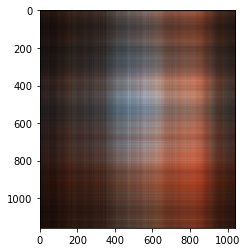

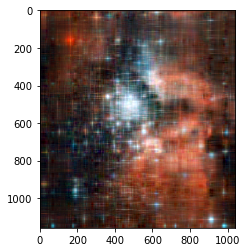

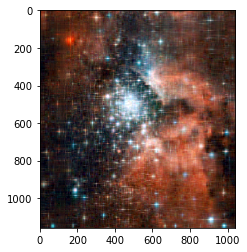

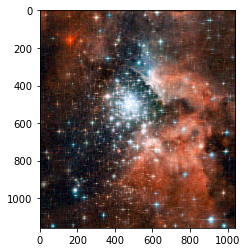

In [172]:
def compress_img(filename, k):
    data = plt.imread(filename).astype(float)
    colors = [data[:, :, 0], data[:, :, 1], data[:, :, 2]]
    for i in range(len(colors)):
        colors[i] = colors[i] / 255
        colors[i] = svd_approx(colors[i], k)
        colors[i][colors[i] > 1] = 1
        colors[i][colors[i] < 0] = 0       
    compressed = np.dstack((colors[0], colors[1], colors[2]))
    plt.imshow(compressed)
    plt.show()

compress_img('../hubble.jpg', 1)
compress_img('../hubble.jpg', 14)
compress_img('../hubble.jpg', 27)
compress_img('../hubble.jpg', 40)